<div style="border: 5px solid dodgerblue; padding: 15px">
    
Оксана, привет!

Меня зовут Аня Львова, я буду проверять твой проект. Предлагаю общаться на “ты”, но если это некомфортно, просто дай знать, и мы перейдем на “вы”:)

Сразу напишу, что моя главная цель – не искать ошибки в твоем коде, а дать персональную обратную связь, чтобы помочь тебе профессионально развиваться и стать аналитиком данных.
    
Я написала более детальные комментарии ниже, они выделены заголовком и цветами.
    
<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Так я обозначаю верные части и те, которые мне особенно понравились: эффективные или красивые решения.
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>
    
Так я отмечу, что в следующий раз можно сделать по-другому. Исправлять недочёты, указанные в этих комментариях необязательно.
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<font size='4'><b>❌ Комментарий ревьюера</b></font>
        
Так я укажу на не самые удачные моменты: их нужно будет учесть и исправить.
</div>

Пожалуйста, не удаляй и не изменяй мои комментарии.

Предлагаю работать в диалоге. В ответ на мои комментарии можешь дать свои: понятны ли мои заметки, что и как ты поменяешь. Можешь выделить их другим цветом. Так мне будет проще выполнить повторное ревью.
    
Еще в последние дни серверу Практикума плохо, и часто изменения в jupyter-ноутбуках пропадают. Поэтому перед тем как отправлять, рекомендую сохранить тетрадку локально. А еще обновить перед отправкой и проверить, что ты отправляешь именно последнюю версию. 
    
</div>

In [1]:
%autosave 30

Autosaving every 30 seconds


<div style="border: 5px solid dodgerblue; padding: 15px">
<font size='4'><b>Комментарий ревьюера 2:</b></font>

Оксана, спасибо за доработки!
    
Теперь все отлично, принимаю проект и желаю успехов в дальнейшем обучении:)
</div>

# Анализ рынка питания в Москве

**Цель:** проанализировать сможет ли наше уникальное кафе снискать популярность на долгое время 
**Задачи:** 
- проанализировать рынок питания в Москве 
- выдвинуть предположения и рекомендации 
- подготовить презентацию для инвесторов 

**Информация о данных:**  
Таблица rest_data:  
•	id — идентификатор объекта;  
•	object_name — название объекта общественного питания;  
•	chain — сетевой ресторан;  
•	object_type — тип объекта общественного питания;  
•	address — адрес;  
•	number — количество посадочных мест.  

##  Загрузка и подготовка данных

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Круто, что есть короткое интро и обзор данных. 
    
Кстати, чтобы в списках внутри markdown-ячеек каждый элемент отображался с новой строки, можно в конце добавлять два пробела.
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>

Привет, спасибо.
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import datetime as dt

from scipy import stats as st
from datetime import datetime, timedelta
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import re 
import plotly.express as px
init_notebook_mode(connected=True)

In [3]:
# код для отображения таблицы без усечений
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 250

In [4]:
data = pd.read_csv('/datasets/rest_data.csv')
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


### Добавляем долготу, широту и название района с помощью API Yandex 

**Для дальнейшей работы, что б получить долготу, широту и район, я обратилась к Яндекс API, но так как там ограниченное количество запросов я сохранила файл CSV с данными  и добавила его на диск, как я выгружала и подключалась к АПИ в коде все закомментировано.** 

In [6]:
#!pip install geopandas

In [7]:
#!pip install yandex-geocoder

In [8]:
#import geopandas
#from IPython.display import IFrame, HTML
#import requests as r
#from yandex_geocoder import Client

In [9]:
#Client = Client("a407bc5b-07d9-4889-a7b0-e9d0126e0982")

In [10]:
#url = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=a407bc5b-07d9-4889-a7b0-e9d0126e0982&geocode='

In [11]:
#url_formatted = url + data['address'][0]
#response = r.get(url_formatted).json()
#response

In [12]:
#point = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
#point

In [13]:
#latitude = float(point.split()[1].lstrip('('))
#longitude = float(point.split()[0].lstrip('('))

#print('Широта - {}, долгота - {}'.format(latitude, longitude))

In [14]:
#latitudes = []
#longitudes = []

#for rest_address in data['address'][:15281]:
    
    #if rest_address == rest_address:
        # чтоб не столкнуться с nan
        #url_formatted = url + 'Москва, ' + rest_address  # на всякий случай добавляем, что это Москва,
                                                         # предполагая, что где-то может быть это не указано
        #response = r.get(url_formatted).json()
        #try:  # именно через try, чтобы функцию не прекратила работу
            #point = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
        #except:  # если результат не получаем, то идем далее по циклу
            #pass
        #if point is not None:  # если ответ есть
            #latitude = float(point.split()[1].lstrip('('))
            #longitude = float(point.split()[0].lstrip('('))
            #latitudes.append(latitude)
            #longitudes.append(longitude)
        #else:  # если ответа не было
            #latitudes.append('')
            #longitudes.append('')  
    #else:  # если ячейка с адресом по очередной строке у нас нулевая
        #latitudes.append('')
        #longitudes.append('') 
    

In [15]:
#data['latitude'] = latitudes
#data['longitude'] = longitudes
#data = data.copy(deep=True)
#data

In [16]:
# данные по району и координатам https://gis-lab.info/qa/moscow-atd.html 
#districts = geopandas.read_file('mo.geojson', driver='GeoJSON')
#districts.info()

In [17]:
#from shapely.geometry import Point  # для работы с границами

In [18]:
#def get_state(row):
#    try:
#        return districts[districts['geometry'].contains(Point(row.longitude, row.latitude))]['NAME'].values[0]
#    except:
#        return np.NaN

#data['district'] = data.apply(get_state, axis=1)
#data.to_csv('additional_data.csv')
#data

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Ничего себе, очень здорово!
</div>

### Дубликаты и типы данных

In [19]:
# импортируем файл с диска 
from io import BytesIO
import requests
spreadsheet_id = '1CHlUUAQXwZi2B-nwj39SNB8PeTLstc32NoA-stqdu-o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
geo_rest = pd.read_csv(BytesIO(r.content))
geo_rest

,id,object_name,chain,object_type,address,number,latitude,longitude,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,55.879005,37.714474,Ярославский
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,55.738307,37.673295,Таганский
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,55.735571,37.669576,Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,55.892713,37.573007,Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,55.904074,37.572279,Лианозово
...,...,...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,55.731855,37.663943,Таганский
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,55.757339,37.659164,Басманный
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,55.757339,37.659164,Басманный
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,55.634029,37.444620,Московский


In [20]:
geo_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           15366 non-null  int64  
 1   object_name  15366 non-null  object 
 2   chain        15366 non-null  object 
 3   object_type  15366 non-null  object 
 4   address      15366 non-null  object 
 5   number       15366 non-null  int64  
 6   latitude     15366 non-null  float64
 7   longitude    15366 non-null  float64
 8   district     15365 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [21]:
# проверяем на дубликаты
geo_rest.duplicated().sum()

0

In [22]:
# приводим названия заведений к нижнему регистру
geo_rest['object_name'] = geo_rest['object_name'].str.lower()


<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Хорошее решение, в реальности из-за регистра часто выявляются дубликаты
</div>

In [23]:
# проверяем на дубликаты без id
geo_rest.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number', 'latitude', 'longitude', 'district']).sum()

85

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Здорово, что проверила дубликаты через subset
</div>

In [24]:
# удаляем дубликаты
geo_rest = geo_rest.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number', 'latitude', 'longitude', 'district']).reset_index(drop=True)

In [25]:
#  проверка
geo_rest.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number', 'latitude', 'longitude', 'district']).sum()

0

In [26]:
#  1 пропуск в районе, удалим эту строчку
geo_rest.dropna(subset = ['district'], inplace=True)

In [27]:
# проверка
geo_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15280 entries, 0 to 15280
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           15280 non-null  int64  
 1   object_name  15280 non-null  object 
 2   chain        15280 non-null  object 
 3   object_type  15280 non-null  object 
 4   address      15280 non-null  object 
 5   number       15280 non-null  int64  
 6   latitude     15280 non-null  float64
 7   longitude    15280 non-null  float64
 8   district     15280 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.2+ MB


Явных дубликатов нет, есть дубликаты неполные -это связано с тем, что данные выгружались из разных источников и айди могло различаться. Все типы данных соответствуют необходимым.

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Писать короткие выводы в конце раздела – хорошая привычка!
</div>

### Аномалии

In [28]:
# уникальные значения названий
geo_rest['object_name'].value_counts()

столовая                   320
кафе                       263
шаурма                     241
шоколадница                158
kfc                        155
                          ... 
совет в филях                1
ресторан «cut»               1
комбинат хлебопродуктов      1
кафе-бар «салют»             1
столовая «тринта»            1
Name: object_name, Length: 9924, dtype: int64

In [29]:
# уникальные значения сетевого
geo_rest['chain'].value_counts()

нет    12316
да      2964
Name: chain, dtype: int64

In [30]:
# уникальные значения типа объекта
geo_rest['object_type'].value_counts()

кафе                                 6071
столовая                             2583
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [31]:
# по количеству мест
geo_rest['number'].value_counts()

0      1588
40      832
20      723
30      681
10      638
       ... 
172       1
520       1
680       1
760       1
495       1
Name: number, Length: 315, dtype: int64

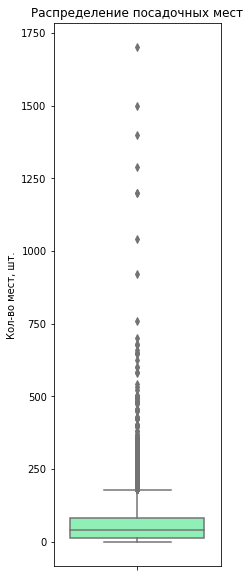

In [32]:
# распределение посадочных мест
plt.figure(figsize=(3,10))
sns.boxplot(y='number', data=geo_rest, palette='rainbow');
plt.ylabel('Кол-во мест, шт.')
plt.title('Распределение посадочных мест');

In [33]:
# делаем срез аномальных значений
geo_rest[geo_rest['number']>500].sort_values(by='number', ascending=False)

,id,object_name,chain,object_type,address,number,latitude,longitude,district
12673,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700,55.741987,37.526717,Дорогомилово
8121,80291,банкетный зал шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500,55.732144,37.561535,Хамовники
8318,27750,столовая-буфет,нет,столовая,"город Москва, улица Волхонка, дом 15",1400,55.744561,37.605454,Хамовники
9035,19719,комбинат питания «управление академсервис»,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288,55.665137,37.478603,Тропарёво-Никулино
3683,27026,рум сервис,нет,ресторан,"город Москва, площадь Европы, дом 2",1200,55.741804,37.567779,Дорогомилово
4476,27024,рум сервис,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200,55.751406,37.565713,Дорогомилово
2313,26560,ресторан «альфа»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040,55.789821,37.749625,Измайлово
9923,171116,eataly,нет,ресторан,"город Москва, Киевская улица, дом 2",920,55.743249,37.562937,Дорогомилово
5637,29232,столовая московский гуманитарный университет,нет,столовая,"город Москва, улица Юности, дом 5, строение 1",760,55.727557,37.817034,Вешняки
13234,200905,white hall,нет,ресторан,"город Москва, Ферганская улица, дом 8",700,55.709231,37.805177,Выхино-Жулебино


Более 500 посадочных мест таких заведений мало, но они есть.

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>
    
Есть смысл убирать аномалии не только когда их мало, но и когда эти данные вызывают вопросы. А в срезе выше банкетные залы и столовые – выглядит правдоподобно. Я бы в таком случае скорее оставила данные
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>

Да думаю ты права, меня просто смутил макдональдс и столовые, которые там были. Но надо было проверить перед тем как удалять, действительно первый мак вмещает 600 чел.. Убрала фильрацию
</div>

### Добавление столбца с улицей

In [34]:
# аллеи, бульвары, деревни, кварталы, линии, микрорайоны, мосты, набережные, парки, 
# переулки, площади, посёлки, проезды, проектируемые проезды, просеки, проспекты, тупики и шоссе.

words = ['проезд','пр.','прзд.','шоссе','шос.','ш.','улица','ул.','переулок','пер.','микрорайон','мкр.','мкрн.', 
         'мкад','Московской Кольцевой Автодороги','деревня','проспект','пр.','площадь','пл','село','аллея','бульвар', 
         'набережная','наб.','тупик','линия','посёлок','территория','квартал','просек','вблизи', 'парк','мост']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
geo_rest["street"] = geo_rest["address"].str.extract(str_pat, flags=re.I)

# Проверяем какие типы улиц не были внесены в список "words" и добавляем в список, если не внесены
geo_rest.isna().sum()

id               0
object_name      0
chain            0
object_type      0
address          0
number           0
latitude         0
longitude        0
district         0
street         192
dtype: int64

In [35]:
geo_rest

,id,object_name,chain,object_type,address,number,latitude,longitude,district,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,55.879005,37.714474,Ярославский,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,55.738307,37.673295,Таганский,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,55.735571,37.669576,Таганский,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,55.892713,37.573007,Лианозово,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,55.904074,37.572279,Лианозово,Абрамцевская улица
...,...,...,...,...,...,...,...,...,...,...
15276,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,55.731855,37.663943,Таганский,3-й Крутицкий переулок
15277,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,55.757339,37.659164,Басманный,улица Земляной Вал
15278,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,55.757339,37.659164,Басманный,улица Земляной Вал
15279,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,55.634029,37.444620,Московский,Киевское шоссе


In [36]:
# создадим таблицу с пропущенными значениями и применим другое регулярное выражение
str_pat = r"^([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
ul_nan = geo_rest.loc[geo_rest['street'].isna(),'address'].str.extract(str_pat, flags=re.I)
ul_nan.columns = ['street']
ul_nan

,street
859,Партизанская улица
860,Партизанская улица
1405,NaN
1406,NaN
1407,NaN
...,...
14388,NaN
14390,NaN
14393,NaN
14398,NaN


In [37]:
# Замена
geo_rest.loc[geo_rest['street'].isna(), 'street'] = ul_nan['street']

In [38]:
# проверка
geo_rest[geo_rest['street'].isna()]

,id,object_name,chain,object_type,address,number,latitude,longitude,district,street
1405,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,56.000396,37.208767,Матушкино,NaN
1406,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,55.995987,37.211471,Матушкино,NaN
1407,20105,кафе «граф монте-кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,55.995589,37.211309,Матушкино,NaN
1408,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,55.993656,37.212980,Матушкино,NaN
1409,151267,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45,55.993656,37.212980,Матушкино,NaN
...,...,...,...,...,...,...,...,...,...,...
14388,205933,кафе «империя бургеров»,нет,кафе,"город Москва, город Зеленоград, корпус 1106Е",24,55.997890,37.191070,Силино,NaN
14390,220595,пекарня № 1,нет,кафетерий,"город Москва, город Зеленоград, корпус 1627",6,55.970811,37.152191,Крюково,NaN
14393,220978,бар суши takai,нет,кафе,"город Москва, город Зеленоград, корпус 1602А",28,55.974730,37.149927,Крюково,NaN
14398,211676,никольский,нет,ресторан,"город Москва, город Зеленоград, корпус 532",120,55.992729,37.256935,Савёлки,NaN


<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Молодец, что использовала регулярные выражения!
</div>

###  Вывод

В предобработке данных, мы: 
- связали с API яндекса и добавили столбец широты и долготы
- с помощью определения границ района определили район и добавили в таблицу
- проверили и избавились от дубликатов
- проверили на аномалии
- с помощью регулярных выржений выделили название улицы в отдельный столбец.

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству. 

In [39]:
# построим распределение видов общественного питания по долготе и широте, симитируя карту
plt.figure(figsize=(20,16))
fig = px.scatter(geo_rest, x="longitude", y="latitude", color="object_type", title ='Карта точек видов общественного питания')
fig.show()


<Figure size 1440x1152 with 0 Axes>

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Здорово, что ты решила использовать карту для визуализации. Хорошо, что есть заголовок
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>
    
Но откровенно говоря сейчас на ней ничего не видно – все точки сбились в кучу.
    
Что можно, если хочется отобразить данные на карте? Нужно как-то агрегировать эти точки.
    
Можно сделать heatmap (пример ниже).
    
Можно подгрузить какие-то полигоны (например, районы) и агрегировать точки в них. 

Можно добавить прозрачности в точки и увидеть приблизительно плотность. Это самый простой, но и самый грязноватый вариант – можешь разкомментить строчку в моем коде и посмотреть. 
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>

Вау, спасибо большое. я хотела изменить прозрачность, но почему-то у меня alpha не работает в плоти.
</div>

In [40]:
!pip install geopandas
import geopandas as gpd

In [41]:
# код ревьюера
gdf = gpd.GeoDataFrame(geo_rest, crs="epsg:4326",
                       geometry=gpd.points_from_xy(geo_rest.longitude, geo_rest.latitude))

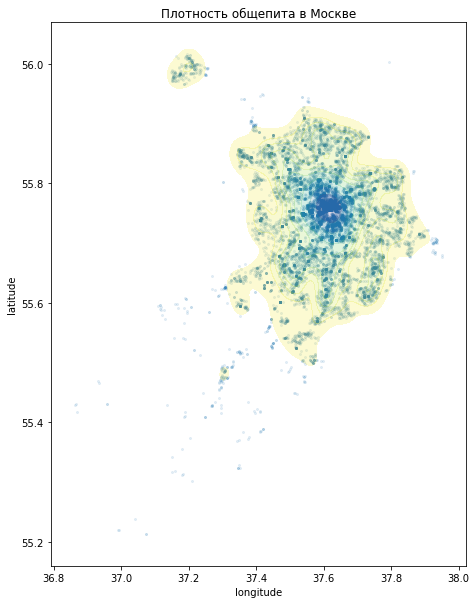

In [42]:
# код ревьюера
fig, ax = plt.subplots(figsize=(10,10))

# heatmap на основе точек
density_plot = sns.kdeplot(
                x=geo_rest['longitude'],
                y=geo_rest['latitude'],
                shade=True,
                alpha=0.2,
                cmap="viridis_r",
                zorder=3
                )

# # карта с точками
gdf.plot(ax=ax, markersize=4, alpha=0.1);

ax.set_title('Плотность общепита в Москве');

На карте распределения мы можем увидить как много заведений в центре и как меньше заведений становится от центра, так же на карте четко прослеживается Зеленоград. На первый взгляд ощущение, что в центре преобадают: бары, магазины с кулинарией и кафе. А предприятия быстрого обслуживания встречаются чаще на окраине.

In [43]:
# круговая диаграмма по объектам общественного питания
fig = go.Figure(data=[go.Pie(labels=geo_rest['object_type'].value_counts().index, 
                             values=geo_rest['object_type'].value_counts(), 
                             title ='Cоотношение видов объектов общественного питания по количеству')])
fig.show() 

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Молодец, что использовала интерактивную библиотеку plotly! Хорошо, что есть заголовок и легенда
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>

Совет на будущее: в большинстве случаев столбиковые диаграммы лучше круговых. Да, многие аналитики действительно используют круговые диаграммы, но профессионалы именно в визуализации данных часто критикуют этот способ отображения информации. Вот пара ссылок, чтобы понять почему:

- статья на русском: http://blog.atkcg.ru/vizualiziruj-pravilno-pie-chart-drug-ili-vrag/  
- интересное видео на английском про то, как люди считывают пай чарты: https://www.youtube.com/watch?v=WF-HWFf-UNc  

А если все же использовать круговые диаграммы, то лучше минимизировать число категорий и объединять меньшие в "прочее"
</div>

По видам объектов, чаще всего всего встречаются: кафе, столовые и рестораны.

### Cоотношение сетевых и несетевых заведений по количеству.

In [44]:
fig_1 = go.Figure(data=[go.Pie(labels=geo_rest['chain'].value_counts().index, 
                             values=geo_rest['chain'].value_counts(), 
                             title ='Cоотношение сетевых и несетевых заведений по количеству.')])
fig_1.show() 

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

А вот тут все отлично изображено!
</div>

Больше всего несетевых заведений.

### Для какого вида объекта общественного питания характерно сетевое распространение

In [45]:
# создаем датафрейм только с сетевыми точками
geo_rest1 = geo_rest.query('chain == "да"')
geo_rest1['object_type'].value_counts()

кафе                                 1396
предприятие быстрого обслуживания     788
ресторан                              543
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              52
бар                                    37
буфет                                  11
столовая                                3
Name: object_type, dtype: int64

In [46]:
# строим диаграмму сетевых точек по объектам 
fig2 = go.Figure(data=[go.Pie(labels=geo_rest1['object_type'].value_counts().index, 
                             values=geo_rest1['object_type'].value_counts(), 
                             title ='Cоотношение видов объектов сетевого общественного питания')])
fig2.show() 

Среди сетевых заведений больше всего кафе, предприятий быстрого обслуживания и потом ресторанов.

In [47]:
# сгруппируем данные по объекту и сети
object_chain = geo_rest.groupby(['object_type', 'chain'])['chain'].count()
object_chain.name = 'count'
object_chain = object_chain.reset_index()
object_chain

,object_type,chain,count
0,бар,да,37
1,бар,нет,818
2,буфет,да,11
3,буфет,нет,565
4,закусочная,да,56
5,закусочная,нет,292
6,кафе,да,1396
7,кафе,нет,4675
8,кафетерий,да,52
9,кафетерий,нет,343


In [48]:
# диаграмма соотношения 
fig = px.bar(
    object_chain,
    x= 'object_type',
    y= 'count',
    color='chain',
    title='Cоотношение видов объектов общественного питания по сетевому распространению',
)
fig.update_xaxes(tickangle=45)
fig.show() 

In [49]:
chain_yes = object_chain[object_chain['chain']=='да'].sort_values(by='count', ascending=False)


In [50]:
all_points = object_chain.groupby('object_type')['count'].sum().reset_index()
all_points.columns = ['object_type','all_points']
chain_yes = chain_yes.merge(all_points, on='object_type', how='left')

chain_yes


,object_type,chain,count,all_points
0,кафе,да,1396,6071
1,предприятие быстрого обслуживания,да,788,1897
2,ресторан,да,543,2282
3,магазин (отдел кулинарии),да,78,273
4,закусочная,да,56,348
5,кафетерий,да,52,395
6,бар,да,37,855
7,буфет,да,11,576
8,столовая,да,3,2583


In [51]:
chain_yes['part'] = (chain_yes['count'] / chain_yes['all_points']).round(3)
chain_yes.sort_values(by='part', ascending=False)

,object_type,chain,count,all_points,part
1,предприятие быстрого обслуживания,да,788,1897,0.415
3,магазин (отдел кулинарии),да,78,273,0.286
2,ресторан,да,543,2282,0.238
0,кафе,да,1396,6071,0.230
4,закусочная,да,56,348,0.161
5,кафетерий,да,52,395,0.132
6,бар,да,37,855,0.043
7,буфет,да,11,576,0.019
8,столовая,да,3,2583,0.001


По соотношению мы можем увидеть, что по соотношению предприятие быстрого обслуживания занимает большую долю сетевых заведений в своей группе: 41.5%, магазин (отдел кулинарии) - 28.6%. 

<div class="alert alert-danger"; style="border-left: 7px solid red">
<font size='4'><b>❌ Комментарий ревьюера</b></font>
        
Чтобы ответить на поставленный вопрос, стоит как раз посчитать долю сетевых заведений в своей группе: почти 50% – это сколько? Можно было бы просто вывести отсортированную таблицу, потому что графики не так хорошо отвечают на этот вопрос
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>
Сделала таблицу.
</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера 2</b></font>

Отлично, с долями гораздо удобнее!
</div>

###  Исследование сетевых заведений

In [52]:
geo_rest1

,id,object_name,chain,object_type,address,number,latitude,longitude,district,street,geometry
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,55.892713,37.573007,Лианозово,Абрамцевская улица,POINT (37.57301 55.89271)
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,55.747388,37.598043,Арбат,переулок Сивцев Вражек,POINT (37.59804 55.74739)
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,55.645334,37.398051,Солнцево,улица Авиаторов,POINT (37.39805 55.64533)
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,55.662334,37.605715,Зюзино,Азовская улица,POINT (37.60571 55.66233)
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,55.840427,37.547360,Коптево,Большая Академическая улица,POINT (37.54736 55.84043)
...,...,...,...,...,...,...,...,...,...,...,...
15276,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,55.731855,37.663943,Таганский,3-й Крутицкий переулок,POINT (37.66394 55.73186)
15277,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,55.757339,37.659164,Басманный,улица Земляной Вал,POINT (37.65916 55.75734)
15278,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,55.757339,37.659164,Басманный,улица Земляной Вал,POINT (37.65916 55.75734)
15279,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,55.634029,37.444620,Московский,Киевское шоссе,POINT (37.44462 55.63403)


In [53]:
# название сетевых
geo_rest1['object_name'].value_counts()

шоколадница                 157
kfc                         155
макдоналдс                  150
бургер кинг                 137
теремок                      94
                           ... 
восточный базар               1
tutti frutti                  1
шантимель (кондитерские)      1
каффе «wokker»                1
кафе prime прайм стар         1
Name: object_name, Length: 577, dtype: int64

In [54]:
# таблица по количеству точек и медианной посадочных мест
chain_rest = geo_rest1.groupby('object_name').agg({'id':'count', 'number':'median'}).reset_index()
chain_rest.sort_values(by ='number', ascending=False)

,object_name,id,number
553,чешская пивная «козловица»,1,306.0
258,кафе му-му,1,300.0
573,ян примус,1,300.0
571,якитория и ян примус,1,282.0
499,старина миллер,1,280.0
...,...,...,...
383,пицца паоло,15,0.0
382,пицца «паоло»,1,0.0
496,стардогs,14,0.0
498,стардогс стардогs,1,0.0


Мы можем увидеть, что в сетевых заведениях есть заведения, где всего одна точка. Это может быть как ошибка в данных, так и молодое заведение, которое планирует быть сетевым. Поэтому рассмотри 2 графика, исключая такие точки и не исключая.

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Еще может быть, например, сетью из Петербурга, которая в Москве представлена только одним заведением.

В целом молодец, что обратила внимание!
</div>

In [55]:
# таблица заведений, где более 2-ух точек
chain_rest_2morepoint = chain_rest[chain_rest['id']!=1]
chain_rest_2morepoint.sort_values(by ='number', ascending=False)

,object_name,id,number
375,пилзнер,2,245.0
83,бакинский бульвар,3,240.0
265,кафе пронто,3,220.0
500,старина мюллер старина миллер,2,215.0
454,ресторан «урюк»,3,200.0
...,...,...,...
324,магазин готовой еды «милти»,3,0.0
421,предприятие быстрого обслуживания «милти»,3,0.0
339,милти,72,0.0
69,wokker,2,0.0


In [56]:
print('Сумма сетевых точек:', chain_rest['id'].sum())
print('Сумма, где точек > 1:', chain_rest_2morepoint['id'].sum())

Сумма сетевых точек: 2964
Сумма, где точек > 1: 2633


Text(23.875, 0.5, 'Количество посадочных мест')

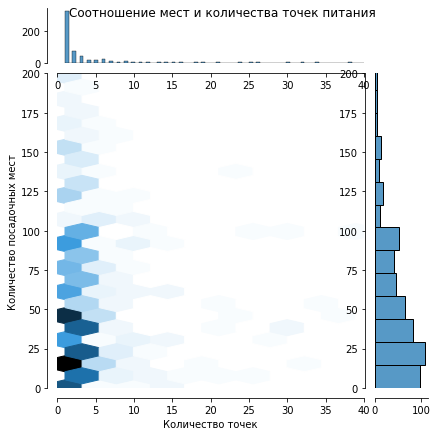

In [57]:
#Соотношение мест и количества точек питания, сделая ограничения что б убрать выбросы
sns.jointplot(x="id", y="number", data=chain_rest, xlim=(0,40), ylim=(0,200),  kind="hex").fig.suptitle('Соотношение мест и количества точек питания')
sns.despine(offset=10)
plt.xlabel("Количество точек")
plt.ylabel("Количество посадочных мест")


Больше всего сетевых заведений с количеством точек от 1 до 5 и с количеством посадочных мест до 50 шт.

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Молодец, верно поняла вопрос и построила подходящий график
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<font size='4'><b>❌ Комментарий ревьюера</b></font>
        
Не забывай про заголовки и подписи к осям: они должны быть на том же языке, что и весь проект
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>

Поправила
</div>

Text(23.875, 0.5, 'Количество посадочных мест')

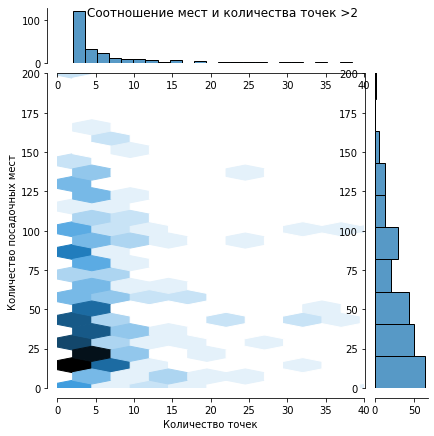

In [58]:
# Соотношение мест и количества точек питания от 2 шт
sns.jointplot(x="id", y="number", data=chain_rest_2morepoint, xlim=(0,40), ylim=(0,200),  kind="hex").fig.suptitle('Соотношение мест и количества точек >2')
sns.despine(offset=10)
plt.xlabel("Количество точек")
plt.ylabel("Количество посадочных мест")


Здесь так же явно наблюдается преобладание заведений с количеством точек от 2 до 7 и количеством посадочных мест до 50.

In [59]:
type_rest = geo_rest1.groupby('object_type').agg({'id':'count', 'number':'median'}).reset_index()
type_rest.sort_values(by ='number', ascending=False)

,object_type,id,number
8,столовая,3,120.0
7,ресторан,543,89.0
0,бар,37,45.0
3,кафе,1396,40.0
6,предприятие быстрого обслуживания,788,25.0
2,закусочная,56,8.0
4,кафетерий,52,8.0
5,магазин (отдел кулинарии),78,3.5
1,буфет,11,0.0


In [60]:
# построим распределение видов общественного питания 
fig = px.scatter(type_rest, x="number", y="id", color="object_type", title ='Распределение точек и мест')
fig.show()

Здесь мы можем в общей сумме увидеть, что у ресторана много посадочных мест, а всего рестораннов очень мало. При этом кафе достаточно много, а мест примерно 40 шт.

### Виды объектов и среднее количество посадочных мест

In [61]:
# убираем заведения, где нет посадочных мест
geo_rest_seat = geo_rest[geo_rest['number'] != 0]
geo_rest_seat1 = geo_rest_seat.groupby(['object_type']).agg({'number':'mean'}).sort_values(by='number',ascending=False).reset_index()
geo_rest_seat1.columns = ['object_type','number']
geo_rest_seat1

,object_type,number
0,столовая,131.276521
1,ресторан,98.789544
2,буфет,57.853516
3,бар,45.007255
4,кафе,41.897485
5,предприятие быстрого обслуживания,32.704225
6,закусочная,16.353293
7,кафетерий,12.774648
8,магазин (отдел кулинарии),11.921875


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>

Почему решила отфильтровать заведения без посадочных мест? Что если речь идет о кафе навынос: в них логично ожидать, нулевое среднее.
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>

Мы планируем открывать кафе с сидячами местами, именно поэтому думаю что нам интересны именно такие места. А нулевые значения могут сдвинуть нам среднюю и медиану, поэтому думаю в данном контесте их лучше исключить.
</div>

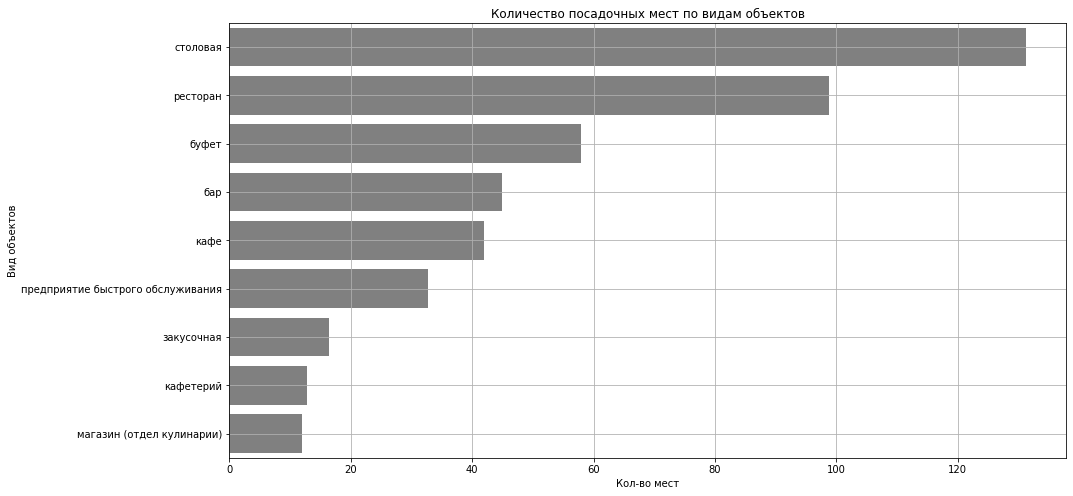

In [62]:
# строим диаграмму со средним

plt.figure(figsize=(15,8))
sns.barplot(x='number', y='object_type', data=geo_rest_seat1, order=geo_rest_seat1['object_type'], color='grey') 

plt.title('Количество посадочных мест по видам объектов')
plt.grid()
plt.xlabel('Кол-во мест')
plt.ylabel('Вид объектов')

plt.show()

<div class="alert alert-danger"; style="border-left: 7px solid red">
<font size='4'><b>❌ Комментарий ревьюера</b></font>
        
В столбиковых диаграммах важно добавлять сортировку
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>
Исправила.
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>
    
Сейчас на графике у каждой категории свой цвет. Но если на графике всего одна переменная и подписи однозначно обозначают каждую из них, то лучше не раскрашивать каждый столбик в отдельный тон или оттенок, одним цветом будет визуально проще и понятнее

</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>
Исправила.
</div>

В среднем больше всего посадочных мест у столовых, ресторанов и буфетов.

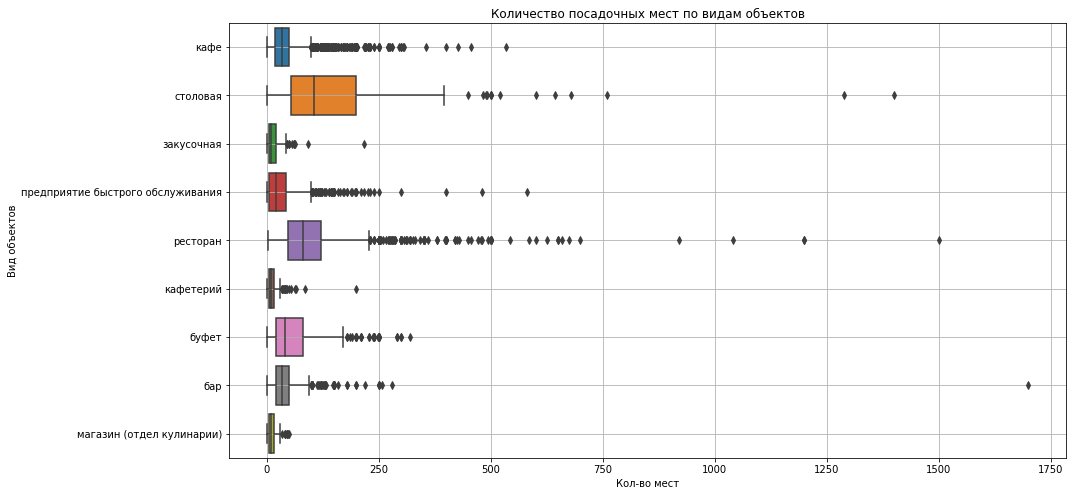

In [63]:
# строим боксплоты
plt.figure(figsize=(15,8))
sns.boxplot(x='number', y='object_type', data=geo_rest_seat, orient="h") 
plt.title('Количество посадочных мест по видам объектов')
plt.grid()
plt.xlabel('Кол-во мест')
plt.ylabel('Вид объектов')

plt.show()

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Здорово, что сравнила медианы и средние!
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>
    
Подписи по оси x читать сложно. Можно было бы сделать график горизонтальным, а не вертикальным. Для этого есть параметр orient

</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>
Исправила.
</div>

Медианные значения так же выше всего у столовых, ресторанов и буфетов.

In [64]:
# describe
geo_rest_seat.groupby('object_type')['number'].describe()

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
бар,827.0,45.007255,67.751969,1.0,20.0,35.0,50.0,1700.0
буфет,512.0,57.853516,56.754527,1.0,20.0,40.0,80.0,320.0
закусочная,167.0,16.353293,21.354178,1.0,5.0,10.0,20.0,216.0
кафе,5765.0,41.897485,37.580781,1.0,18.0,35.0,50.0,533.0
кафетерий,284.0,12.774648,15.933783,1.0,5.0,9.0,15.0,200.0
магазин (отдел кулинарии),128.0,11.921875,11.518290,1.0,4.0,8.5,15.0,50.0
предприятие быстрого обслуживания,1207.0,32.704225,44.142704,1.0,6.0,20.0,43.0,580.0
ресторан,2238.0,98.789544,94.720448,2.0,48.0,80.0,120.0,1500.0
столовая,2564.0,131.276521,94.883938,1.0,55.0,105.0,200.0,1400.0


Среднее количество посадочных мест:
- у столовых - 131
- у ресторанов - 98
- у буфетов - 58

Медианные значения:
- у столовых - 105
- у ресторанов - 80
- у буфетов - 40

### Топ-10 улиц по количеству объектов общественного питания.

In [65]:
# топ 10 улиц
top_street = geo_rest.groupby('street').agg({'id':'count'}).sort_values(by='id',ascending=False).head(10).reset_index()
top_street

,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,172
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Все верно
</div>

In [66]:
# строим диаграмму
fig = px.bar(
    top_street, x='street', y='id', title='Топ-10 улиц по количеству объектов общественного питания'
)
fig.update_xaxes(tickangle=45)
fig.show() 

In [67]:
# добавляем районы в топ улиц
top_street_dis = geo_rest[['street', 'district']]
top_street = top_street.merge(top_street_dis, how='left', on='street')
top_street.pivot_table(index=['street', 'district']).sort_values(by='id', ascending=False)

id
street                 district                      
проспект Мира          Ярославский                203
                       Свиблово                   203
                       Ростокино                  203
                       Останкинский               203
                       Мещанский                  203
                       Алексеевский               203
Профсоюзная улица      Обручевский                182
                       Академический              182
                       Коньково                   182
                       Тёплый Стан                182
                       Черёмушки                  182
                       Ясенево                    182
Ленинградский проспект Аэропорт                   172
                       Хорошёвский                172
                       Сокол                      172
                       Беговой                    172
Пресненская набережная Пресненский                167
Варшавское шоссе       Донской                    165
                       Воскресенское              165
                       Нагатино-Садовники         165
                       Щербинка                   165
                       Южное Бутово               165
                       Нагорный                   165
                       Чертаново Южное            165
                       Чертаново Центральное      165
                       Чертаново Северное         165
Ленинский проспект     Ломоносовский              148
                       Тёплый Стан                148
                       Якиманка                   148
                       Тропарёво-Никулино         148
                       Проспект Вернадского       148
                       Обручевский                148
                       Донской                    148
                       Гагаринский                148
проспект Вернадского   Раменки                    128
                       Тропарёво-Никулино         128
                       Таганский                  128
                       Гагаринский                128
                       Ломоносовский              128
                       Проспект Вернадского       128
Кутузовский проспект   Фили-Давыдково             114
                       Дорогомилово               114
Каширское шоссе        Нагатино-Садовники         111
                       Орехово-Борисово Северное  111
                       Орехово-Борисово Южное     111
                       Москворечье-Сабурово       111
Кировоградская улица   Чертаново Северное         108
                       Чертаново Центральное      108
                       Чертаново Южное            108

В топ-10 улиц по количеству заведений невероятно много районов. Поэтому количество заведений скорей всего связано с их длинной. Например улица Мира и Профсоюзная улица примерно 9 км и все эти улицы соединяют кольца.

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Отлично, все верно подметила!
</div>

### Число улиц с одним объектом общественного питания

In [68]:
# улицы с 1 заведением
street_1 = geo_rest.groupby('street').agg({'id':'count'}).reset_index()
street_1 = street_1.query('id == 1')
street_1

,street,id
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1972,улица Шумилова,1
1973,улица Шумкина,1
1977,улица Щорса,1
1978,улица Энгельса,1


In [69]:
# добавляем районы к данным улицам
street_1 = street_1.merge(top_street_dis, how='left', on='street')
street_1.pivot_table(index=['street', 'district']).sort_values(by='id', ascending=False)

,,id
street,district,
1-й Балтийский переулок,Аэропорт,1
Таганрогская улица,Люблино,1
Тарусская улица,Ясенево,1
Тарханская улица,Выхино-Жулебино,1
Таёжная улица,Лосиноостровский,1
...,...,...
Гродненская улица,Можайский,1
Дегтярный переулок,Тверской,1
Делегатская улица,Тверской,1


594 улицы с 1 заведением на ней. Можно посмотреть каких районов с такими улицами больше всего.

In [70]:
street_1.pivot_table(index=['street', 'district']).groupby('district').agg({'id': 'count'}).sort_values(by='id', ascending=False)

,id
district,
Таганский,27
Хамовники,26
Тверской,26
Басманный,22
Пресненский,21
...,...
Киевский,1
Капотня,1
Старое Крюково,1


Больше всего таких улиц в районнах: Таганский, Хамовники, Тверской. Данные районы это самый центр Москвы. Так скорее всего из-за большого количества маленьких улочек, находящихся в центре.

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

И вновь подходящее объяснение – молодчина!
</div>

### Вывод 

При анализе, мы выявили:

- Много заведений в центре и все меньше заведений становится от центра
- На первый взгляд ощущение, что в центре преобадают: бары, магазины с кулинарией и кафе. А предприятия быстрого обслуживания встречаются чаще на окраине.
- По видам объектов, чаще всего всего встречаются: кафе, столовые и рестораны.
- Несетевые заведения преобладают над сетевыми
- Среди сетевых заведений больше всего кафе, предприятий быстрого обслуживания и потом ресторанов.
- По соотношению предприятие быстрого обслуживания занимает большую долю сетевых заведений в своей группе, почти 50%
- Больше всего сетевых заведений с количеством точек от 1 до 7 и с количеством посадочных мест до 50 шт.
- В общей сумме у ресторана много посадочных мест, а всего рестораннов очень мало. При этом кафе достаточно много, а мест примерно 40 шт.
- В среднем больше всего посадочных мест у столовых, ресторанов и буфетов.
- Самые популярные по количеству заведений: проспект Мира, Профсоюзная ул., Лениградская ул.
- Больше всего улиц с 1-им заведением, в районнах: Таганский, Хамовники, Тверской. Данные районы это самый центр Москвы. 

## Общий вывод

**В предобработке данных, мы:**

- связали с API яндекса и добавили столбец широты и долготы
- с помощью определения границ района определили район и добавили в таблицу
- проверили и избавились от дубликатов
- проверили и избавились от аномалий
- с помощью регулярных выржений выделили название улицы в отдельный столбец.

**При анализе, мы выявили:**

- Много заведений в центре и все меньше заведений становится от центра
- На первый взгляд ощущение, что в центре преобадают: бары, магазины с кулинарией и кафе. А предприятия быстрого обслуживания встречаются чаще на окраине.
- По видам объектов, чаще всего всего встречаются: кафе, столовые и рестораны.
- Несетевые заведения преобладают над сетевыми
- Среди сетевых заведений больше всего кафе, предприятий быстрого обслуживания и потом ресторанов.
- По соотношению предприятие быстрого обслуживания занимает большую долю сетевых заведений в своей группе, почти 50%
- Больше всего сетевых заведений с количеством точек от 1 до 7 и с количеством посадочных мест до 50 шт.
- В общей сумме у ресторана много посадочных мест, а всего рестораннов очень мало. При этом кафе достаточно много, а мест в среднем 40 шт.
- В среднем больше всего посадочных мест у столовых, ресторанов и буфетов.
- Самые популярные по количеству заведений: проспект Мира, Профсоюзная ул., Лениградская ул.
- Больше всего улиц с 1-им заведением, в районнах: Таганский, Хамовники, Тверской. Данные районы это самый центр Москвы.


На основании вышеизложенного,
**Рекомендации:**

- лучше всего открывать кафе. В ресторан люди чаще всего приходят за высоккачественным обслуживанием и там очень важен личный контакт;
- на первое время лучше открыть несетевое кафе, в дальнейшем можно рассмотреть небольшую сеть до 7 точек.
- оптимальное количество мест для кафе от 35-41.
- выбирая место открытия, можно придерживаться 1 из 2ух тактик:
    1. открывать на улице, где 1 заведение, так как нет конкуренции и такие улицы в большинстве своем находятся в центре, гле хорошая проходимость
    2. на самых рестораанх улицах, где уже проверено конкурентами на проспект Мира, Профсоюзная ул., Лениградская ул. и т.д.. Так как наше кафе будет выделятся на фоне конкурентов.

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>

Хорошо, что есть общий вывод и конкретные рекомендации для инвесторов
</div>

## Презентация

<https://yadi.sk/i/or6cIIwMNbmRlg>

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера</b></font>
    
Что понравилось в презентации:  

— есть цели исследования,  
— есть оглавление,  
— на каждом слайде с графиком есть выводы,      
— есть рекомендации для инвесторов,  
— презентация в .pdf,  
– хорошее, чистое оформление,  
– на каждый слайд приходится по одной мысли, логическому блоку.  
    
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<font size='4'><b>💡 Комментарий ревьюера</b></font>

Что можно было бы сделать лучше:  
— добавить имя и фамилию автора, дату проведения исследования,    
— добавить нумерацию страниц.
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>
ФИ и дата были на титульнике. нумерацию добавила.
</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size='4'><b>👍 Комментарий ревьюера 2</b></font>
    
Точно, я не заметила, извини! У меня аккурат на месте подписи кнопка с нумерацией🙈

<img src='https://jing.yandex-team.ru/files/aslvova/Screenshot%202022-06-16%20at%2012.19.08.png' width='600'>
    
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<font size='4'><b>❌ Комментарий ревьюера</b></font>
        
Что точно стоит поправить:   
— добавить источники данных, т.е. откуда были получены данные для анализа.
</div>

<div class="alert alert-info"; style="info">
<font size='4'><b>Комментарий студента</b></font>
Исправила.
</div>

<div style="border: 5px solid dodgerblue; padding: 15px">

<font size='4'><b>Общий комментарий</b></font>

Оксана, спасибо за проект! Видно, что ты старалась и проделала большую самостоятельную работу. А еще моя основная профессия – урбанистика, так что мне особенно приятно, что ты попробовала сделать карту:)

Есть несколько доработок – надеюсь, тебе будет понятно, почему я оставила те или иные комментарии. 
    
Буду ждать твою работу на повторное ревью!

</div>